# 02.04 systems of equations: nonlinear systems

##### code, support for section text

In [ ]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [ ]:
if True: # settings for the people
  from matplotlib.patches import Circle
  import matplotlib.pyplot as plt
  import numpy as np
  from tabulate import tabulate


###### code, examples

In [ ]:
#https://numpy.org/doc/stable/reference/generated/numpy.dot.html

def eg_32():

  # prof-def
  f1 = lambda x: x[1] - pow(x[0],3)
  f2 = lambda x: pow(x[0],2) + pow(x[1],2) - 1
  df1x1 = lambda x: -3*pow(x[0],2)
  df1x2 = lambda x: 1
  df2x1 = lambda x: 2*x[0]
  df2x2 = lambda x: 2*x[1]

  # prob-def, generalized
  s_title = f"example 32"
  s_label = f"$g_1(x) = 1 - x^3$"
  ws = []

  # prof-def, runtime
  x0 = np.array([1,2]) # first guess ~ remember what the equations represent graphically
  eps = 1e-6
  imax = 10 # lol, not even this

  x_old = x0.copy()
  x_new = x_old.copy()

  count = 0
  ws.append([count,x_new[0],x_new[1],np.nan]) # note: string type supercedes number in format

  # calc
  error = 2*eps
  while (error > eps) and (count <= imax):
    F = [f1(x_old),f2(x_old)]
    DF = [[df1x1(x_old),df1x2(x_old)],[df2x1(x_old),df2x2(x_old)]]
    x_new = x_old - np.linalg.inv(DF)@F
    error = abs(np.linalg.norm(x_new)-np.linalg.norm(x_old))
    x_old = x_new.copy()
    count += 1
    ws.append([count,x_new[0],x_new[1],error])

  if True: # plot
    y1 = lambda x: pow(x,3)

    xs_plt = np.linspace(-1.1,1.1,101)
    y1s_plt = y1(xs_plt)

    fig,axs = plt.subplots(1,2)
    fig.set_figwidth(10)
    fig.set_figheight(5)

    # plot, data
    # f1, cubic
    axs[0].plot(xs_plt,y1s_plt,color="C1",label="$v + u^3 = 0$",zorder=10)
    axs[1].plot(xs_plt,y1s_plt,color="C1",label="$v + u^3 = 0$",zorder=10)
    # f2, circle
    circle = Circle((0,0),1,fill=False,color="C2",label="$u^2+v^2=1$",zorder=11)
    axs[0].add_patch(circle)
    axs[0].set_aspect('equal')
    whynoreuse = Circle((0,0),1,fill=False,color="C2",label="$u^2+v^2=1$",zorder=11)
    axs[1].add_patch(whynoreuse)
    axs[1].set_aspect('equal')
    # roots
    axs[0].scatter([-x_new[0],x_new[0]],[-x_new[1],x_new[1]],marker="*",s=150,c="red",label="roots",zorder=20)
    axs[1].scatter([-x_new[0],x_new[0]],[-x_new[1],x_new[1]],marker="*",s=150,c="red",label="roots",zorder=20)
    # iterations
    axs[1].scatter([xy[1] for xy in ws],[xy[2] for xy in ws],label="some data",zorder=30)

    # plot, style, data point labels
    offset = 0.025
    for ixy in range(1,4):
      sxy = f"$x_{ixy}$"
      axs[1].text(ws[ixy][1],ws[ixy][2]-0.5*offset+pow(-1,ixy)*2*offset,sxy,zorder=40)

    # plot, style
    fig.suptitle("\n"+s_title)
    axs[0].axis("off")
    axs[1].set(xlim=(-0.1,1.1))
    axs[1].set(ylim=(-0.1,1.1))
    plt.grid()
    plt.legend(bbox_to_anchor=(1.02,1),loc='upper left',borderaxespad=0)
    # plot, show
    plt.show()

  if False: # table
    print("\n",x_new.flatten(),error,count)
  else: # output table
    s_ifmt = "03d"
    if np.max(np.absolute(ws)[:,-1]) >= 10:
      s_ffmt = ".14e"
    else:
      s_ffmt = ".14f"
    print() # spacer
    #print(f"\n{s_title}\n")
    if len(ws) > 10:
      print(tabulate(ws[0:6][:],headers=["i","u","v","error"],intfmt=s_ifmt,floatfmt=s_ffmt,missingval='',tablefmt="github").replace("nan","   "))
      print(tabulate(ws[-5:][:],intfmt=s_ifmt,floatfmt=s_ffmt,missingval='',tablefmt="github").replace("nan","   "))
    else:
      print(tabulate(ws,headers=["i","u","v","error"],intfmt=s_ifmt,floatfmt=s_ffmt,missingval='',tablefmt="github").replace("nan","   "))


## 0 intro

why stop at one? part four.

$y = f(x) = c_1x + e^{c_2x} \Rightarrow ln\,y = k + c_2x \overbrace{\rightarrow}^{k = ln\, c_1}$ with linear fit then reconstitute $c_1$.

## 1 multivariate newtons method

heres with one:

$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}.$$

and heres a few:

\begin{align}
  f_1(u,v,w) &= 0 \\
  f_2(u,v,w) &= 0 \\
  f_3(u,v,w) &= 0.
\end{align}

let vector-valued function $F(u,v,w) = (f_1,f_2,f_3)$ and problem be $F(x) = 0$ where $x = (u,v,w)$.

the analogue of derivative $f'$ for one variable becomes the <b>jacobian matrix</b>

\begin{align}
  DF(x) =
  \begin{bmatrix}
    \frac{\partial f_1}{\partial u} &
      \frac{\partial f_1}{\partial v} &
      \frac{\partial f_1}{\partial w} \\
    \frac{\partial f_2}{\partial u} &
      \frac{\partial f_2}{\partial v} &
      \frac{\partial f_2}{\partial w} \\
    \frac{\partial f_3}{\partial u} &
      \frac{\partial f_3}{\partial v} &
      \frac{\partial f_3}{\partial w} \\
  \end{bmatrix}
\end{align}

both one-variable and multivariate derive from linear approximation afforded by taylor expansion. for the latter,

$$F(x) = F(x_0) + DF(x_0)\cdot(x-x_0) + \mathcal{O}(x-x_0)^2$$

eg, linear expansion of $F(u,v) = (e^{u+v},sin\;u)$ around $x_0 = (0,0)$,

\begin{align}
  F(x) &=
  \begin{bmatrix} 1 \\ 0 \end{bmatrix}
  + \begin{bmatrix} e^0 & e^0 \\ cos\; 0 & 0 \end{bmatrix}
  \begin{bmatrix} u \\ v \end{bmatrix} + \mathcal{O}(x^2) \\
  &= \begin{bmatrix} 1 \\ 0 \end{bmatrix}
  + \begin{bmatrix} u+v \\ u \end{bmatrix} + \mathcal{O}(x^2)
\end{align}

oc ignore $\mathcal{O}(x^2)$ like 1D and let $x=r$ be the root and $x_0$ be current guess. then

\begin{align}
  0 &= F(r) \approx F(x_0) + DF(x_0)\cdot(r-x_0) \\
  \\
  &\Rightarrow -DF(x_0)^{-1}F(x_0) \approx r - x_0
\end{align}

##### algorithm <b>newtons multivariate</b>

\begin{align}
  x_0 &= \text{initial vector} \\
  x_{k+1} &= x_k - (DF(x_k))^{-1}F(x_k), \quad k=0,1,2,\dots
\end{align}

inverses are costly so avoid them.

\begin{align}
  DF(x_k)s &= -F(x_k) \\
  x_{k+1} &= x_k + s
\end{align}

##### example 32

apply newtons multivariate with $x_0 = (1,2)$,

\begin{align}
  v - u^3 &= 0 \\
  u^2 + v^2 &= 1 \\
  \\
  &\Downarrow \\
  \\
  f_1(u,v) &= v-u^3 \\
  f_2(u,v) &= u^2 + v^2 - 1 \\
  \\
  &\Downarrow \\
  \\
  DF(u,v) &= \begin{bmatrix} -3u^2 & 1 \\ 2u & 2v \end{bmatrix}.
\end{align}

with $x_0 = (1,2)$,

\begin{align}
  \underbrace{
    \begin{bmatrix} -3 & 1 \\ 2 & 4 \end{bmatrix}
  }_{DF(x_0)}
  \begin{bmatrix} s_1 \\ s_2 \end{bmatrix}
  =-\underbrace{
    \begin{bmatrix} 1 \\ 4 \end{bmatrix}
  }_{F(x_0)}.
\end{align}

with $s = (0,-1) \Rightarrow x_1 = x_0 + s = (1,1)$,

\begin{align}
  \underbrace{
    \begin{bmatrix} -3 & 1 \\ 2 & 2 \end{bmatrix}
  }_{DF(x_1)}
  \begin{bmatrix} s_1 \\ s_2 \end{bmatrix}
  =-\underbrace{
    \begin{bmatrix} 0 \\ 1 \end{bmatrix}
  }_{F(x_1)}.
\end{align}

with $s = (-\frac{1}{8},-\frac{3}{8}) \Rightarrow x_2 = x_1 + s = (\frac{7}{8},\frac{5}{8})$.

further steps below.

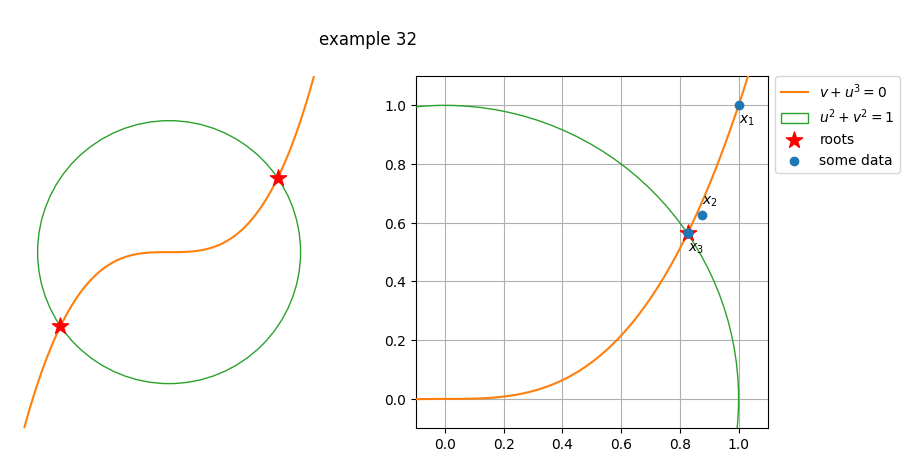


|   i |                u |                v |              error |
|-----|------------------|------------------|--------------------|
| 000 | 1.00000000000000 | 2.00000000000000 |                    |
| 001 | 1.00000000000000 | 1.00000000000000 |   0.82185441512669 |
| 002 | 0.87500000000000 | 0.62500000000000 |   0.33892290399277 |
| 003 | 0.82903634826712 | 0.56434911242604 |   0.07239924479452 |
| 004 | 0.82604010817065 | 0.56361977350284 |   0.00288665890212 |
| 005 | 0.82603135773241 | 0.56362416213163 |   0.00000475463577 |
| 006 | 0.82603135765419 | 0.56362416216126 |   0.00000000004792 |


In [ ]:
eg_32()

note the quadratic convergence, hooray.
</br>


## 2 broydens method

like how there is secant to newton-raphson 1D, here is broydens for when there are no derivatives.

suppose $A_i$ is best approximation available at step $i$ to the jacobian matrix, then

$$x_{i+1} = x_i - A_i^{-1}F(x_i).$$

to update $A_i$ to $A_{i+1}$, respect the derivative aspect of jacobian $DF$,

$$A_{i+1}\delta_{i+1} = \Delta_{i+1},$$

where $\delta_{i+1} = x_{i+1} - x_i, \Delta_{i+1} = F(x_{i+1})$. bc no new information for orthogonal component of $\delta_{i+1}$,

$$A_{i+1}w = A_iw$$

for every $w$ such that $\delta_{i+1}^Tw = 0$.

$$A_{i+1} = A_i + \frac{(\Delta_{i+1}-A_i\delta_i)\delta_{i+1}^T}{\delta_{i+1}^T\delta_{i+1}}.$$

broydens needs intial guess $x_0$ and initial approximate jacobian $A_0$, which can be identity matrix if no better guess.

##### algorithm <b>broydens method i</b>

```
x0 = initial vector
A0 = initial matrix
for i = 0, 1, 2, ...
  x[i+1] = x[i] - inv(A[i])F(x[i])
  A[i+1] = A[i] + (Δ[i+1]-A[i]δ[i+1])T(δ[i+1])/(T(δ[i+1])δ[i+1])
end

# where δ[i+1] = x[i+1] - x[i] and Δ[i+1] = F(x[i+1]) - F(x[i]).
```

###### cheaper

to remove costly solver at $A_i\delta_{i+1} = F(x_i)$, use an inverse.

let $B_i = A_i^{-1}$. then

$$\delta_{i+1} = B_{i+1}\Delta_{i+1},$$

where $\delta_{i+1} = x_{i+1} - x_i, \Delta_{i+1} = F(x_{i+1}) - F(x_i)$ and for every $w$ satisfying $\delta_{i+1}^Tw = 0$, still satisfy $A_{i+1}w = A_iw$, or

$$B_{i+1}A_iw = w.$$

a matrix that satisfies these two conditions is

$$B_{i+1} = B_i + \frac{(\delta_{i+1} - B_i\Delta_{i+1})\delta_{i+1}^TB_i}{\delta_{i+1}^TB_i\Delta_{i+1}}.$$

and

$$x_{i+1} = x_i + B_iF(x_i).$$

as with broydens i, ii needs intial guess $x_0$ and initial jacobian substitute $B_0$, which can be identity matrix if no better guess.

##### algorithm <b>broydens method ii</b>

```
x0 = initial vector
B0 = initial matrix
for i = 0, 1, 2, ...
  x[i+1] = x[i] - B[i]F(x[i])
  B[i+1] = B[i] + ((δ[i+1]-B[i]Δ[i+1])δ[i+1]ᵀB[i]) / (δ[i+1]ᵀB[i]Δ[i+1])
end

# where δ[i] = x[i] - x[i-1] and Δ[i] = F(x[i]) - F(x[i-1]).
```

##### usw

a perceived disadvantage to broyden ii is that estimates for the jacobian are not easily available. $B_i$ is an estimate for the matrix inverse of the jacobian. broyden i keeps track of $A_i$ which is the estimate of the jacobian. which is why i is "good broyden" and ii is "bad broyden".

like secant to newton, broyden converges slower than newtons multivariate.